In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/oasis-dataset/Advertising.csv")

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<Axes: >

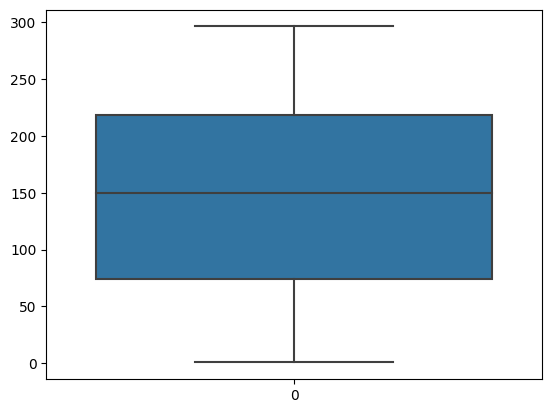

In [ ]:
sns.boxplot(data['TV'])


<Axes: >

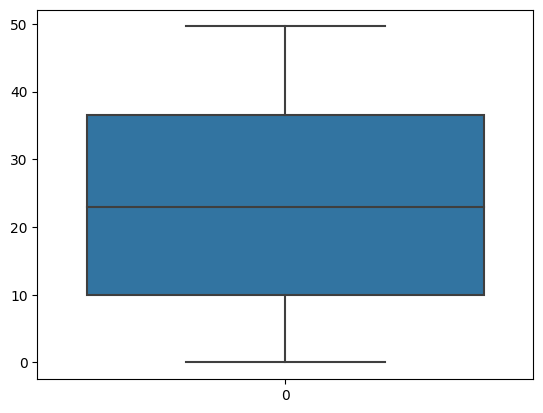

In [ ]:
sns.boxplot(data['Radio'])

<Axes: >

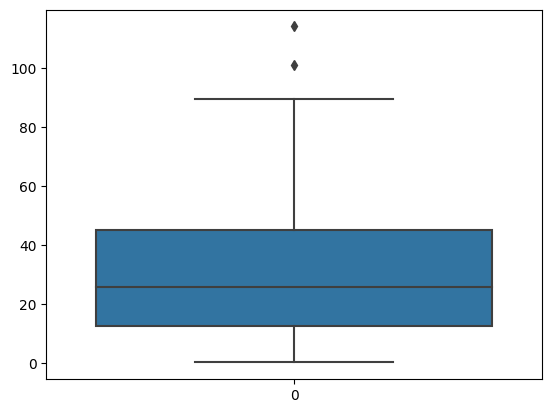

In [ ]:
sns.boxplot(data['Newspaper'])

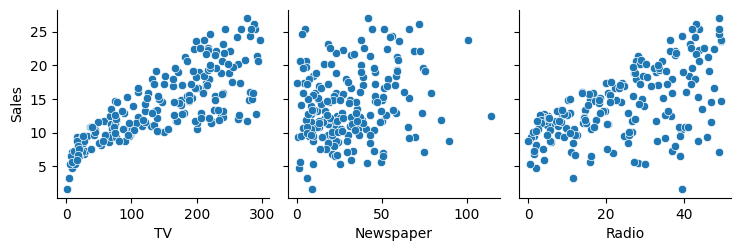

In [ ]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

<Axes: >

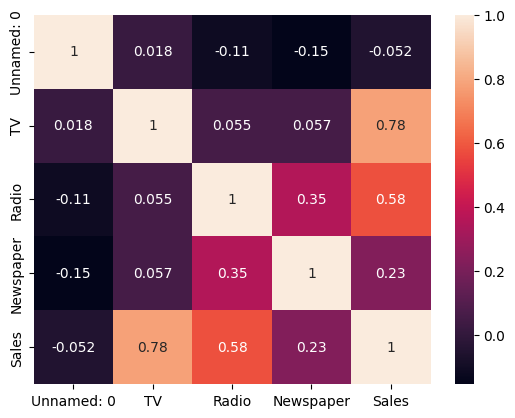

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
y=data['Sales']
x=data.drop('Unnamed: 0',axis=1)
x=x.drop('Sales',axis=1)

In [ ]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [ ]:
model=[SVR(),XGBRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),LinearRegression(),RandomForestRegressor(),LGBMRegressor()]
for i in model:
    curr_model=i
    i.fit(x_train, y_train)
    # print(i," ","Train case R2 score in %: ",r2_score(y_train,y_train_pred)*100)
    y_test_pred=i.predict(x_test)
    print(i," ","Test case R2 score in %: ",r2_score(y_test,y_test_pred)*100)
    print("\n")

SVR()   Test case R2 score in %:  83.52526732946343


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)   Test case R2 score in %:  97.48897055961977


AdaBoostRegressor()   Test case R2 score in %:  96.29964977166473


GradientBoostingRegressor()   Test case R2 score in %:  98.08777652503767


LinearRegress